# Introduction to mathematical statistics 

Welcome to the lecture 11 in 02403

During the lectures we will present both slides and notebooks. 

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop

### Example: Two-way ANOVA

To introduce two-way ANOVA we start by considering the following data (and do some data visuallisation)

In [90]:
# Typing the data:
data = pd.DataFrame({
    'value':      [2.8, 3.6, 3.4, 2.3, 5.5, 6.3, 6.1, 5.7, 5.8, 8.3, 6.9, 6.1], 
    'treatment':  np.repeat(["A", "B", "C"], 4),
    'block':      np.tile(["1", "2", "3", "4"], 3)})
data

value treatment block
0     2.8         A     1
1     3.6         A     2
2     3.4         A     3
3     2.3         A     4
4     5.5         B     1
5     6.3         B     2
6     6.1         B     3
7     5.7         B     4
8     5.8         C     1
9     8.3         C     2
10    6.9         C     3
11    6.1         C     4

##### Visualising the data with box plots:

Text(0.5, 0.98, 'Boxplots')

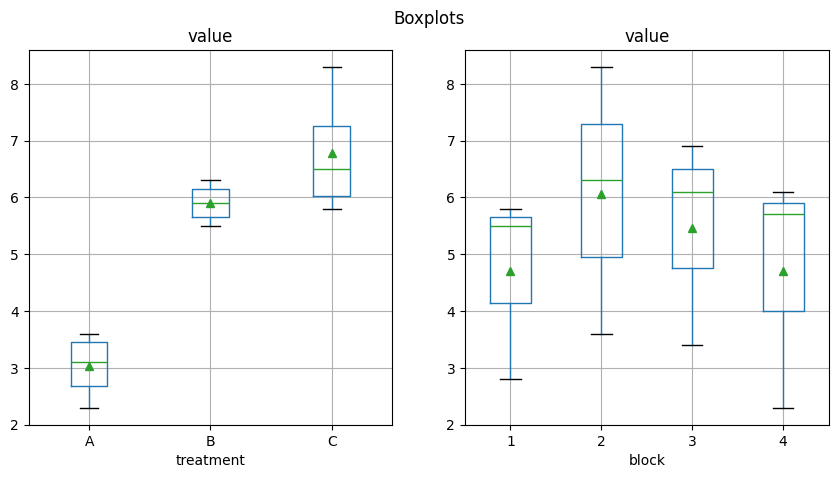

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.boxplot("value", by="treatment", ax=axs[0], showmeans=True)
data.boxplot("value", by="block", ax=axs[1], showmeans=True)
fig.suptitle("Boxplots")

Things to consider:

Does it look like the value is different for different treatments?

Does it look like the value is diiferent for different blocks?

### Example: Estimate parameters $\mu$, $\alpha_i$ and $\beta_j$

In [92]:
# Compute the overall mean and add to dataframe:
data['overall_mean'] = data["value"].mean()
data

value treatment block  overall_mean
0     2.8         A     1      5.233333
1     3.6         A     2      5.233333
2     3.4         A     3      5.233333
3     2.3         A     4      5.233333
4     5.5         B     1      5.233333
5     6.3         B     2      5.233333
6     6.1         B     3      5.233333
7     5.7         B     4      5.233333
8     5.8         C     1      5.233333
9     8.3         C     2      5.233333
10    6.9         C     3      5.233333
11    6.1         C     4      5.233333

In [93]:
# compute the mean within each treatment-group and add to dataframe:
data['treatment_mean'] = data.groupby("treatment")['value'].transform('mean')
data

value treatment block  overall_mean  treatment_mean
0     2.8         A     1      5.233333           3.025
1     3.6         A     2      5.233333           3.025
2     3.4         A     3      5.233333           3.025
3     2.3         A     4      5.233333           3.025
4     5.5         B     1      5.233333           5.900
5     6.3         B     2      5.233333           5.900
6     6.1         B     3      5.233333           5.900
7     5.7         B     4      5.233333           5.900
8     5.8         C     1      5.233333           6.775
9     8.3         C     2      5.233333           6.775
10    6.9         C     3      5.233333           6.775
11    6.1         C     4      5.233333           6.775

In [94]:
# also add the corresponding alpha for each treatment-group:
data["treatment_alpha"] = data["treatment_mean"] - data["overall_mean"]
data

value treatment block  overall_mean  treatment_mean  treatment_alpha
0     2.8         A     1      5.233333           3.025        -2.208333
1     3.6         A     2      5.233333           3.025        -2.208333
2     3.4         A     3      5.233333           3.025        -2.208333
3     2.3         A     4      5.233333           3.025        -2.208333
4     5.5         B     1      5.233333           5.900         0.666667
5     6.3         B     2      5.233333           5.900         0.666667
6     6.1         B     3      5.233333           5.900         0.666667
7     5.7         B     4      5.233333           5.900         0.666667
8     5.8         C     1      5.233333           6.775         1.541667
9     8.3         C     2      5.233333           6.775         1.541667
10    6.9         C     3      5.233333           6.775         1.541667
11    6.1         C     4      5.233333           6.775         1.541667

In [95]:
# compute the mean within each person (block) and add to dataframe:
data['block_mean'] = data.groupby("block")['value'].transform('mean')

# also add the corresponding beta for each person (block):
data["block_beta"] = data["block_mean"] - data["overall_mean"]

data

value treatment block  overall_mean  treatment_mean  treatment_alpha  \
0     2.8         A     1      5.233333           3.025        -2.208333   
1     3.6         A     2      5.233333           3.025        -2.208333   
2     3.4         A     3      5.233333           3.025        -2.208333   
3     2.3         A     4      5.233333           3.025        -2.208333   
4     5.5         B     1      5.233333           5.900         0.666667   
5     6.3         B     2      5.233333           5.900         0.666667   
6     6.1         B     3      5.233333           5.900         0.666667   
7     5.7         B     4      5.233333           5.900         0.666667   
8     5.8         C     1      5.233333           6.775         1.541667   
9     8.3         C     2      5.233333           6.775         1.541667   
10    6.9         C     3      5.233333           6.775         1.541667   
11    6.1         C     4      5.233333           6.775         1.541667   

    block_mean  block_beta  
0     4.700000   -0.533333  
1     6.066667    0.833333  
2     5.466667    0.233333  
3     4.700000   -0.533333  
4     4.700000   -0.533333  
5     6.066667    0.833333  
6     5.466667    0.233333  
7     4.700000   -0.533333  
8     4.700000   -0.533333  
9     6.066667    0.833333  
10    5.466667    0.233333  
11    4.700000   -0.533333

### Example: SST, SS(Tr), SS(Bl) and SSE

$Y_{ij} = \mu + \alpha_i + \beta_j + \epsilon_{ij}$

We start with residuals (and SSE):

In [96]:
# calculate the residuals according to the model:
data['residual'] = data['value'] - (data['overall_mean']+data['treatment_alpha']+data['block_beta'])
data

value treatment block  overall_mean  treatment_mean  treatment_alpha  \
0     2.8         A     1      5.233333           3.025        -2.208333   
1     3.6         A     2      5.233333           3.025        -2.208333   
2     3.4         A     3      5.233333           3.025        -2.208333   
3     2.3         A     4      5.233333           3.025        -2.208333   
4     5.5         B     1      5.233333           5.900         0.666667   
5     6.3         B     2      5.233333           5.900         0.666667   
6     6.1         B     3      5.233333           5.900         0.666667   
7     5.7         B     4      5.233333           5.900         0.666667   
8     5.8         C     1      5.233333           6.775         1.541667   
9     8.3         C     2      5.233333           6.775         1.541667   
10    6.9         C     3      5.233333           6.775         1.541667   
11    6.1         C     4      5.233333           6.775         1.541667   

    block_mean  block_beta  residual  
0     4.700000   -0.533333  0.308333  
1     6.066667    0.833333 -0.258333  
2     5.466667    0.233333  0.141667  
3     4.700000   -0.533333 -0.191667  
4     4.700000   -0.533333  0.133333  
5     6.066667    0.833333 -0.433333  
6     5.466667    0.233333 -0.033333  
7     4.700000   -0.533333  0.333333  
8     4.700000   -0.533333 -0.441667  
9     6.066667    0.833333  0.691667  
10    5.466667    0.233333 -0.108333  
11    4.700000   -0.533333 -0.141667

In [97]:
data['sse_contribution'] = data['residual']**2

SSE = data['sse_contribution'].sum()

print(SSE)

1.241666666666668


Now calculate SST:

In [98]:
data['sst_contribution'] = (data['value'] - data['overall_mean'])**2

SST = data['sst_contribution'].sum()

print(SST)

35.98666666666667


Now calculate SS(tr) and SS(Bl):

In [99]:
data['sstr_contribution'] = (data['treatment_mean'] - data['overall_mean'])**2

SSTr = data['sstr_contribution'].sum()

print(SSTr)

30.791666666666668


In [100]:
data['ssbl_contribution'] = (data['block_mean'] - data['overall_mean'])**2

SSBl = data['ssbl_contribution'].sum()

print(SSBl)

3.953333333333335


In [101]:
# sanity check:
print(SST)
print(SSTr + SSBl + SSE)

35.98666666666667
35.98666666666667


Projection set up

In [102]:
one = np.repeat(1,4)
zero = np.repeat(0,4)
X0 = np.ones((12,1))
col2 = np.append(np.append(zero,one),zero)
col3 = np.append(np.append(zero,zero),one)

X_tr = np.array([col2,col3]).T

X_bl0 = np.c_[X0,X_tr]

X_bl = np.array([[0,1,0,0,0,1,0,0,0,1,0,0],
                 [0,0,1,0,0,0,1,0,0,0,1,0],
                 [0,0,0,1,0,0,0,1,0,0,0,1]]).T

X = np.c_[X0,X_tr,X_bl]
X

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1.]])

In [103]:
data

value treatment block  overall_mean  treatment_mean  treatment_alpha  \
0     2.8         A     1      5.233333           3.025        -2.208333   
1     3.6         A     2      5.233333           3.025        -2.208333   
2     3.4         A     3      5.233333           3.025        -2.208333   
3     2.3         A     4      5.233333           3.025        -2.208333   
4     5.5         B     1      5.233333           5.900         0.666667   
5     6.3         B     2      5.233333           5.900         0.666667   
6     6.1         B     3      5.233333           5.900         0.666667   
7     5.7         B     4      5.233333           5.900         0.666667   
8     5.8         C     1      5.233333           6.775         1.541667   
9     8.3         C     2      5.233333           6.775         1.541667   
10    6.9         C     3      5.233333           6.775         1.541667   
11    6.1         C     4      5.233333           6.775         1.541667   

    block_mean  block_beta  residual  sse_contribution  sst_contribution  \
0     4.700000   -0.533333  0.308333          0.095069          5.921111   
1     6.066667    0.833333 -0.258333          0.066736          2.667778   
2     5.466667    0.233333  0.141667          0.020069          3.361111   
3     4.700000   -0.533333 -0.191667          0.036736          8.604444   
4     4.700000   -0.533333  0.133333          0.017778          0.071111   
5     6.066667    0.833333 -0.433333          0.187778          1.137778   
6     5.466667    0.233333 -0.033333          0.001111          0.751111   
7     4.700000   -0.533333  0.333333          0.111111          0.217778   
8     4.700000   -0.533333 -0.441667          0.195069          0.321111   
9     6.066667    0.833333  0.691667          0.478403          9.404444   
10    5.466667    0.233333 -0.108333          0.011736          2.777778   
11    4.700000   -0.533333 -0.141667          0.020069          0.751111   

    sstr_contribution  ssbl_contribution  
0            4.876736           0.284444  
1            4.876736           0.694444  
2            4.876736           0.054444  
3            4.876736           0.284444  
4            0.444444           0.284444  
5            0.444444           0.694444  
6            0.444444           0.054444  
7            0.444444           0.284444  
8            2.376736           0.284444  
9            2.376736           0.694444  
10           2.376736           0.054444  
11           2.376736           0.284444

In [106]:
H = X @ np.linalg.inv(X.T @ X) @ X.T
H_bl0 = X_bl0 @ np.linalg.inv(X_bl0.T @ X_bl0) @ X_bl0.T
H0 = X0@ np.linalg.inv(X0.T @ X0) @ X0.T
I = np.identity(12)
y = data["value"]
SST = y.T @ (I - H0) @ y
SSTr = y.T @ (H_bl0 - H0) @ y
SSBl = y.T @ (H - H_bl0) @ y
SSE = y.T @ (I - H) @ y
np.array([SSTr, SSBl, SSE, SST])


array([30.79166667,  3.95333333,  1.24166667, 35.98666667])

### Example: F-test and ANOVA table

TReatment groups:

$F_{Tr}=\frac{SS(Tr)/(k-1)}{SSE/((k-1)(l-1))}$

In [ ]:
# Compute F-statistic (for treatment groups)
FTr = (SSTr/(3-1)) / (SSE/((3-1)*(4-1)))
print(FTr)

In [ ]:
# compute critical value:
stats.f.ppf(0.95, dfn = (3-1), dfd = (3-1)*(4-1) )

In [ ]:
# p-value
p_Tr = 1 - stats.f.cdf(FTr, dfn = (3-1), dfd = (3-1)*(4-1) )
print(p_Tr)

Blocks:

$F_{Bl}=\frac{SS(Bl)/(l-1)}{SSE/((k-1)(l-1))}$

In [ ]:
# Compute F-statistic (for block)
FBl = (SSBl/(4-1)) / (SSE/((3-1)*(4-1)))
print(FBl)

In [ ]:
# compute critical value:
stats.f.ppf(0.95, dfn = (4-1), dfd = (3-1)*(4-1) )

In [ ]:
# p-value
p_Bl = 1 - stats.f.cdf(FBl, dfn = (4-1), dfd = (3-1)*(4-1) )
print(p_Bl)

##### Twoway ANOVA table

In [ ]:
# Make the ANOVA table:
fit = smf.ols("value ~ treatment + block", data=data).fit()
anova_table = sm.stats.anova_lm(fit)
print(anova_table)


### Example: Model diagnostics

$Y_{ij} = \mu + \alpha_i + \beta_j + \epsilon_{ij}$

In [ ]:
# QQplot:
sm.qqplot(data["residual"], line='q',a=1/2)
plt.tight_layout()
plt.show()

In [ ]:
# Plot residuals grouped by either treatment or block:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.boxplot("residual", by="treatment", showmeans=True, ax=axs[0])
data.boxplot("residual", by="block", showmeans=True, ax=axs[1])
fig.suptitle("Boxplots of residuals")
plt.show()

## Skive Fjord

In [ ]:
SkiveAvg = pd.read_csv("../week1/skiveAvg.csv", sep=';')
SkiveAvg["vmp"] = pd.Categorical(SkiveAvg["vmp"])
SkiveAvg["month"] = pd.Categorical(SkiveAvg["month"])
SkiveAvg["year_f"] = pd.Categorical(SkiveAvg["year"])
SkiveAvg

In [ ]:
fit = smf.ols("Nload ~ month + vmp", data=SkiveAvg).fit()
sm.stats.anova_lm(fit,typ=3)

In [ ]:
sm.stats.anova_lm(fit,typ=3)

In [ ]:
fit.summary(slim=True)

In [ ]:
#fig, ax =plt.subplots(1,2)
plt.plot(np.arange(2,13),fit.params[1:12])

In [ ]:
fit_year = smf.ols("Nload ~ month + year_f", data=SkiveAvg).fit()
sm.stats.anova_lm(fit_year,typ=1)

In [ ]:
sm.stats.anova_lm(fit,fit_year)

In [ ]:
fig, ax =plt.subplots(1,2)
ax[0].plot(np.arange(2,13),fit_year.params[1:12])
ax[1].plot(np.arange(1983,2007),np.array(fit_year.params[12:36]))